In [14]:
import networkx as nx
import numpy as np

In [2]:
G = nx.Graph()

In [3]:
def cycle(n):
    graph = nx.Graph()
    graph.update([(i, (i + 1) % n) for i in range(n)], range(n))

    return graph

In [4]:
c = cycle(5)
print(c.nodes(), c.edges())

[0, 1, 2, 3, 4] [(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]


In [5]:
def cartesian(G, H):
    ans = nx.Graph()

    ans.add_nodes_from((v, x) for v in G.nodes() for x in H.nodes())
    ans.add_edges_from(
        ((u, x), (v, y)) 
        for u in G.nodes() 
        for v in G.nodes() 
        for x in H.nodes() 
        for y in H.nodes() 
        if (u == v and (x, y) in H.edges()) or ((u, v) in G.edges() and x == y)
    )

    return ans

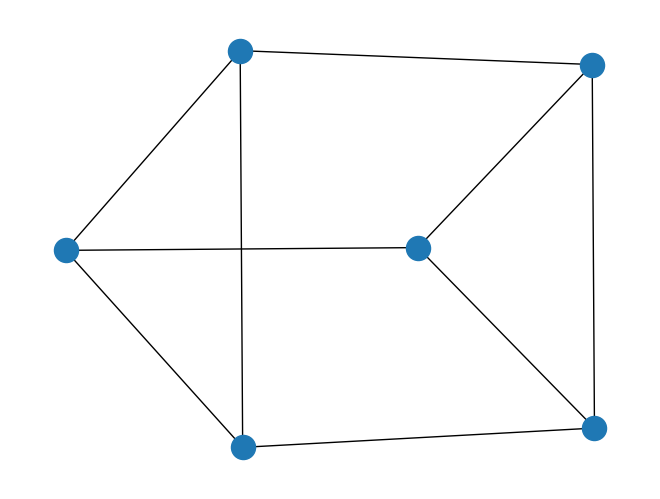

In [6]:
nx.draw(cartesian(cycle(2), cycle(3)))

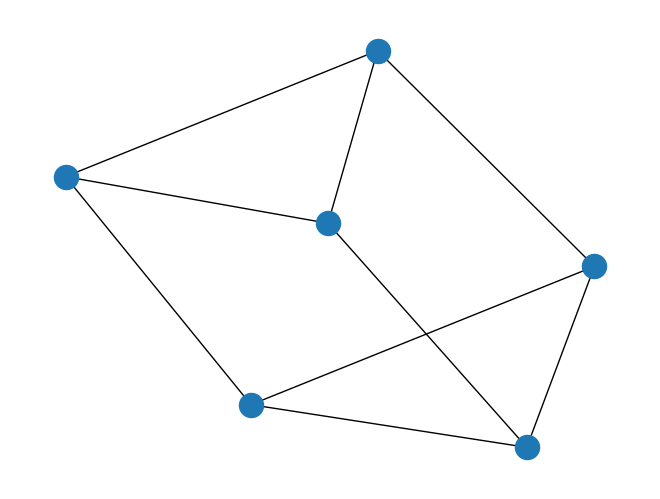

In [7]:
nx.draw(nx.cartesian_product(cycle(2), cycle(3)))

In [24]:
def adjecency_matrix(graph):
    V = graph.nodes()
    return np.array([[graph.has_edge(v, u) for u in V] for v in V], dtype=int)

In [25]:
adjecency_matrix(cycle(5))

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])